In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dynascale as ds

2023-05-07 15:53:39.639026: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

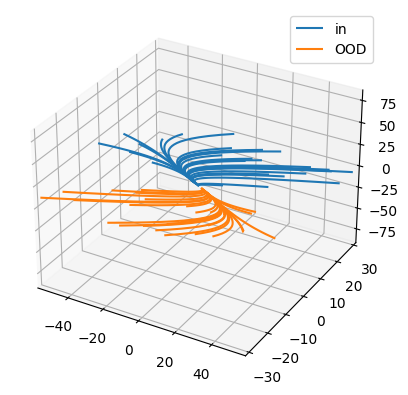

In [3]:
challenge = ds.LDSChallenge(2, 3)
x1 = challenge.make_data(50, n=100)
x2 = challenge.make_data(50, n=100, in_dist=False)
ds.utils.lds.plot([x1, x2], labels=["in", "OOD"])